In [36]:
%%capture
!pip install diffusers
!pip install transformers
!pip install accelerate
import matplotlib.pyplot as plt
from PIL import Image # used to represent images


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

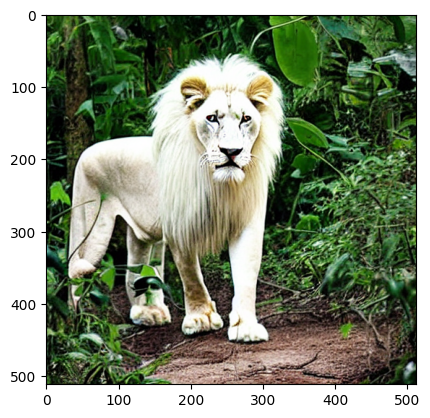

In [24]:
# a tool used to generate images using stable diffusion
from diffusers import DiffusionPipeline
generator = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
# specifies what GPUs should be used for this generation
generator.to("cuda")
image = generator("A photo of a white lion in the jungle.").images[0]
plt.imshow(image);

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  0%|          | 0/50 [00:00<?, ?it/s]

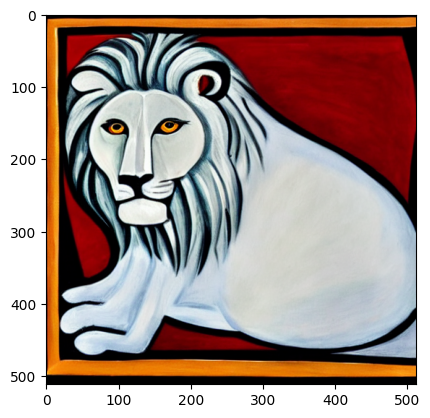

In [39]:
image = generator("A painting of a white lion in the style of Picasso.").images[0]

plt.imshow(image);

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


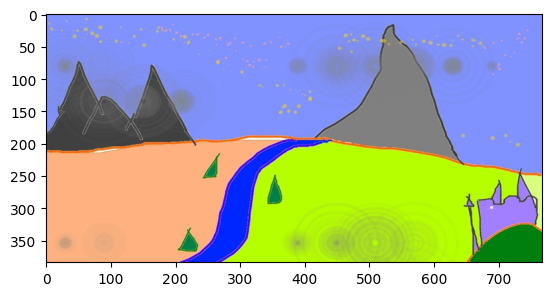

In [58]:
# pipeline used for image to image generation with stable diffusion
from diffusers import StableDiffusionImg2ImgPipeline
# loads a pretrained generator model
generator = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
# moves the generator model to the GPU (CUDA) for faster processing
generator.to("cuda")
init_image = Image.open("landscape.jpg")
init_image.thumbnail((768,768)) # resizes the image to prepare it as input of the model
plt.imshow(init_image);

  0%|          | 0/37 [00:00<?, ?it/s]

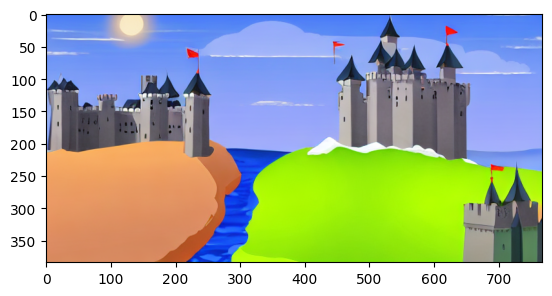

In [61]:
# a detailed prompt describing the desired visual
# for the produced image
prompt = "A realistic mountain landscape with a large castle."
image = generator(prompt=prompt,
image = init_image, strength=0.75).images[0]
plt.imshow(image);

  0%|          | 0/50 [00:00<?, ?it/s]

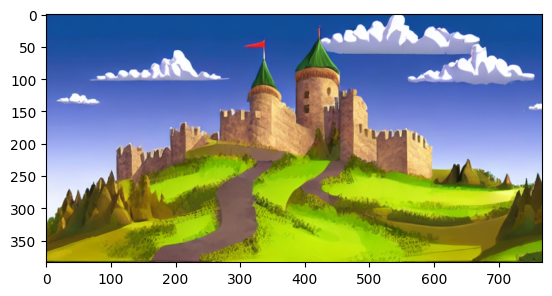

In [62]:
# generate a new image based on the prompt and the
# initial image using the generator model
image = generator(prompt=prompt,
image = init_image, strength=1).images[0]
plt.imshow(image);

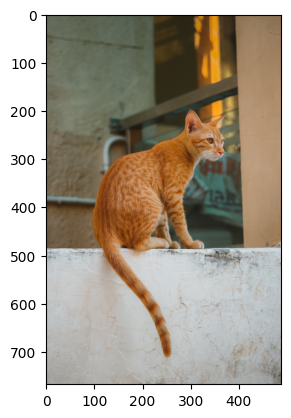

In [63]:
init_image = Image.open("cat_1.jpg")
init_image.thumbnail((768, 768))
plt.imshow(init_image);

  0%|          | 0/25 [00:00<?, ?it/s]

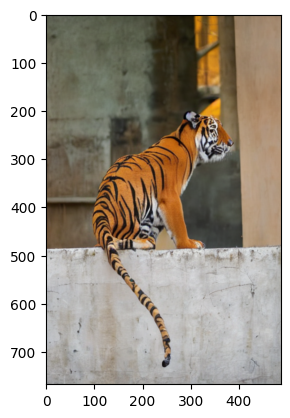

In [64]:
prompt = "A photo of a tiger"
image = generator(prompt=prompt, image=init_image, strength=0.5).images[0]
plt.imshow(image);

  0%|          | 0/37 [00:00<?, ?it/s]

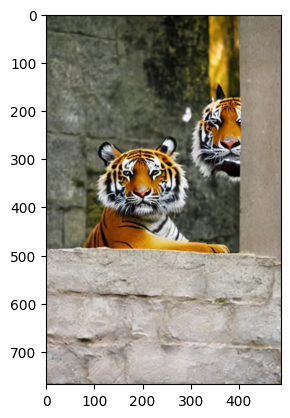

In [66]:
image = generator(prompt=prompt,
image = init_image, strength=0.75).images[0]
plt.imshow(image);

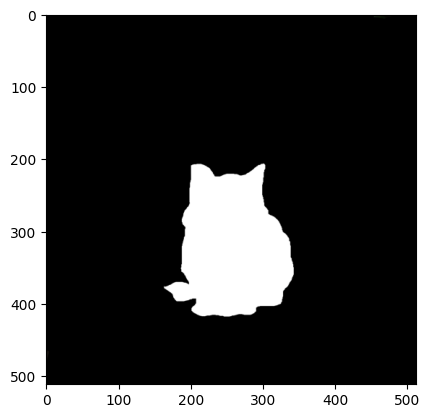

In [81]:
# tool used for text-guided image in-painting
from diffusers import StableDiffusionInpaintPipeline
init_image = Image.open("cat_on_bench.png").resize((512, 512))
plt.imshow(init_image);
mask_image = Image.open("cat_mask.jpg").resize((512, 512))
plt.imshow(mask_image);

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

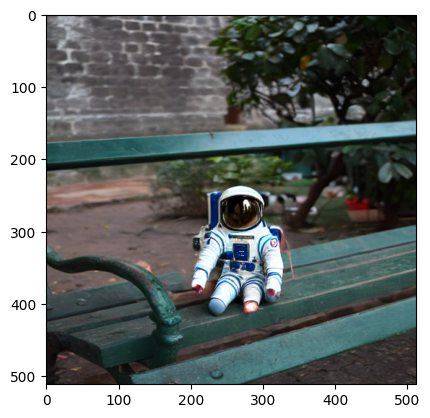

In [84]:
generator = StableDiffusionInpaintPipeline.from_pretrained("runwayml/stable-diffusion-inpainting")
generator = generator.to("cuda")
prompt = "A photo of an astronaut"
image = generator(prompt=prompt,image=init_image, mask_image=mask_image).images[0]
plt.imshow(image);

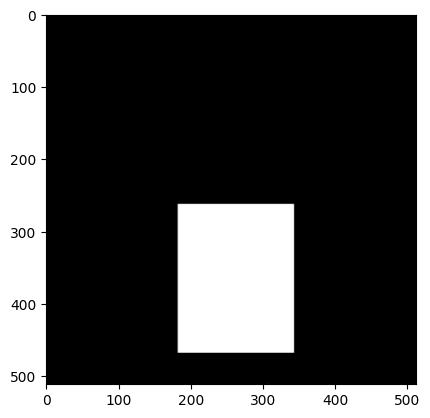

In [88]:
init_image = Image.open("desk.jpg").resize((512, 512))
plt.imshow(init_image);
mask_image = Image.open("desk_mask.jpg").resize((512, 512))
plt.imshow(mask_image);

  0%|          | 0/50 [00:00<?, ?it/s]

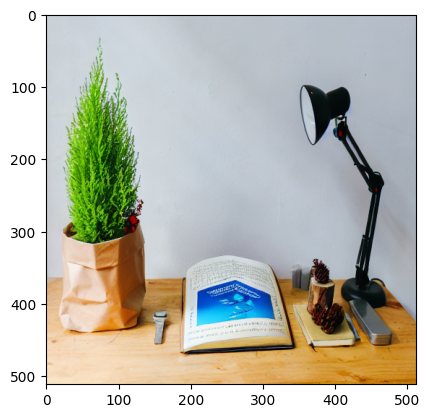

In [90]:
prompt = "A photo of a book"
image = generator(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
plt.imshow(image);